In [43]:
#Graph Visual 1: Which regions are affected the most by the zombie outbreak?

# Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the base directory, directory pathing aid by Xpert Learning Assistant
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))  # Navigate up two levels to the main project directory

# Search for the CSV file in Stephen's folder
csv_path = os.path.join(base_dir, 'Stephen', 'johns_hopkins_github_data_pull', 'covid_reports_2021-23_us', '01-01-2023.csv')

# Read 01-01-2023 CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Dropping unneeded columns for this graph
columns_to_drop = df.columns[1:5].tolist() + df.columns[7:20].tolist()
trimmed_df = df.drop(columns=columns_to_drop)
trimmed_df.head()

,Province_State,Confirmed,Deaths
0,Alabama,1568934,20737
1,Alaska,301432,1455
2,American Samoa,8266,34
3,Arizona,2378334,32182
4,Arkansas,985747,12695


In [44]:
# Sort to the top 10 states of infected cases
sorted_df = trimmed_df.sort_values(by=['Confirmed'], ascending=False)
sorted_df['Confirmed'] = sorted_df['Confirmed'].astype(int)
sorted_df.head(10)

,Province_State,Confirmed,Deaths
5,California,11835450,98544
49,Texas,8211474,91594
11,Florida,7338503,83906
36,New York,6576267,75139
17,Illinois,3969832,40678
43,Pennsylvania,3416142,48892
37,North Carolina,3316814,27629
40,Ohio,3307568,41257
26,Michigan,2988654,40767
12,Georgia,2985193,41417


In [45]:
sorted_df.dtypes

Province_State    object
Confirmed          int32
Deaths             int64
dtype: object

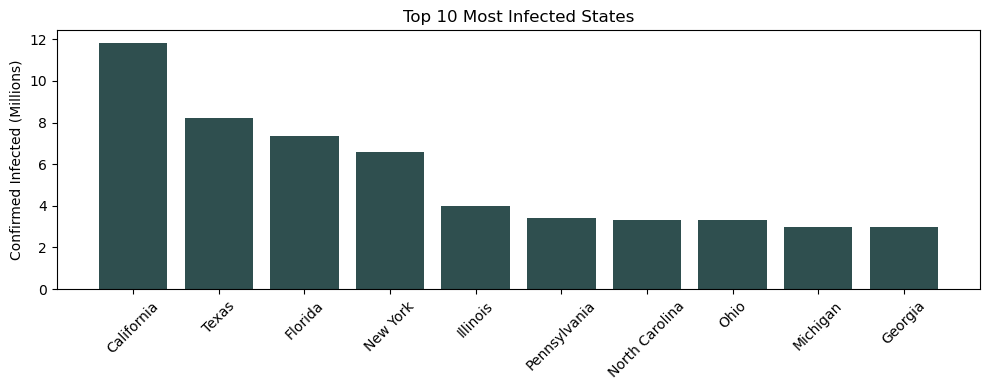

In [62]:
# Convert the 'Confirmed' values to millions and create the 'Confirmed_millions' column
sorted_df['Confirmed_millions'] = sorted_df['Confirmed'] / 1000000

# Plotting
plt.figure(figsize=(10, 4))
plt.bar(sorted_df.head(10)['Province_State'], sorted_df.head(10)['Confirmed_millions'], color='darkslategray', align="center")
plt.title("Top 10 Most Infected States")
plt.ylabel("Confirmed Infected (Millions)")
plt.xticks(rotation=45)

# Set the y-tick labels to show values in millions
plt.yticks(range(0, int(sorted_df['Confirmed_millions'].max()) + 2, 2))

plt.tight_layout()

# Save graph as a png file to the desired directory
output_dir = "Images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.savefig(os.path.join(output_dir, 'Top_10_Most_Infected_States.png'))

plt.show()

In [47]:
#Graph Visual 2: Are there any signs shown in the data that the country is able 
# to control the outbreak by the end of the year?

# Set the base directory, directory pathing aid by Xpert Learning Assistant
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))  # Navigate up two levels to the main project directory

# Search for the CSV file in Stephen's folder
start_csv_path = os.path.join(base_dir, 'Stephen', 'johns_hopkins_github_data_pull', 'covid_reports_2020', '04-01-2020.csv')
mid_csv_path = os.path.join(base_dir, 'Stephen', 'johns_hopkins_github_data_pull', 'covid_reports_2021-23_us', '09-01-2021.csv')
end_csv_path = os.path.join(base_dir, 'Stephen', 'johns_hopkins_github_data_pull', 'covid_reports_2021-23_us', '03-01-2023.csv')

# Read both CSVs into separate DataFrames
start_df = pd.read_csv(start_csv_path)
mid_df = pd.read_csv(mid_csv_path)
end_df = pd.read_csv(end_csv_path)

# Dropping unneeded columns for the graph
# 04-01-2020
start_columns_to_drop = start_df.columns[0:2].tolist() + start_df.columns[3:7].tolist() + start_df.columns[9:18].tolist()
start_trimmed_df = start_df.drop(columns=start_columns_to_drop)

start_trimmed_df.head()

,Province_State,Confirmed,Deaths
0,South Carolina,4,0
1,Louisiana,47,1
2,Virginia,7,0
3,Idaho,195,3
4,Iowa,1,0


In [48]:
#09-01-2021
mid_columns_to_drop = mid_df.columns[1:5].tolist() + mid_df.columns[7:21].tolist()
mid_trimmed_df = mid_df.drop(columns=mid_columns_to_drop)
mid_trimmed_df.head()

,Province_State,Confirmed,Deaths
0,Alabama,704420,12291
1,Alaska,89345,448
2,American Samoa,0,0
3,Arizona,1016663,18853
4,Arkansas,455781,6969


In [49]:
# 03-01-2023
end_columns_to_drop = end_df.columns[1:5].tolist() + end_df.columns[7:18].tolist()
end_trimmed_df = end_df.drop(columns=end_columns_to_drop)
end_trimmed_df.head()

,Province_State,Confirmed,Deaths
0,Alabama,1642062,21001
1,Alaska,307073,1486
2,American Samoa,8320,34
3,Arizona,2440294,33076
4,Arkansas,1004752,12980


In [50]:
# Group by 'Province_State' and sum the 'Confirmed' values
merged_start_df = start_trimmed_df.groupby('Province_State').sum().reset_index()

# Sort the merged DataFrame by 'Confirmed' values in descending order
sorted_merged_df = merged_start_df.sort_values(by='Confirmed', ascending=False)

us_states = ['California', 'Massachusetts', 'Michigan', 'New Jersey', 'New York']   #top 5 states with the highest confirmed cases

# Filter the DataFrame to keep only US states
start_us_states_df = sorted_merged_df[sorted_merged_df['Province_State'].isin(us_states)]

# Display the DataFrame with only US states
start_us_states_df.head(5)


,Province_State,Confirmed,Deaths
89,New York,83948,1923
86,New Jersey,22255,355
74,Michigan,9315,335
13,California,9262,199
71,Massachusetts,7738,122


In [51]:
# Group by 'Province_State' and sum the 'Confirmed' values
merged_mid_df = mid_trimmed_df.groupby('Province_State').sum().reset_index()

# Sort the merged DataFrame by 'Confirmed' values in descending order
sorted_merged_df = merged_mid_df.sort_values(by='Confirmed', ascending=False)

us_states = ['California', 'Massachusetts', 'Michigan', 'New Jersey', 'New York']   #top 5 states with the highest confirmed cases

# Filter the DataFrame to keep only US states
mid_us_states_df = sorted_merged_df[sorted_merged_df['Province_State'].isin(us_states)]

# Display the DataFrame with only US states
mid_us_states_df.head(5)


,Province_State,Confirmed,Deaths
5,California,4479579,65683
36,New York,2282836,54282
34,New Jersey,1094249,26902
26,Michigan,1065671,21616
25,Massachusetts,761906,14787


In [52]:
# Group by 'Province_State' and sum the 'Confirmed' values
merged_start_df = end_trimmed_df.groupby('Province_State').sum().reset_index()

# Sort the merged DataFrame by 'Confirmed' values in descending order
sorted_merged_df = merged_start_df.sort_values(by='Confirmed', ascending=False)

us_states = ['California', 'Massachusetts', 'Michigan', 'New Jersey', 'New York']

# Filter the DataFrame to keep only US states
end_us_states_df = sorted_merged_df[sorted_merged_df['Province_State'].isin(us_states)]

# Display the DataFrame with only US states
end_us_states_df.head(10)

,Province_State,Confirmed,Deaths
5,California,12097613,100747
36,New York,6782812,77043
26,Michigan,3057222,42096
34,New Jersey,3043089,35982
25,Massachusetts,2216870,24131


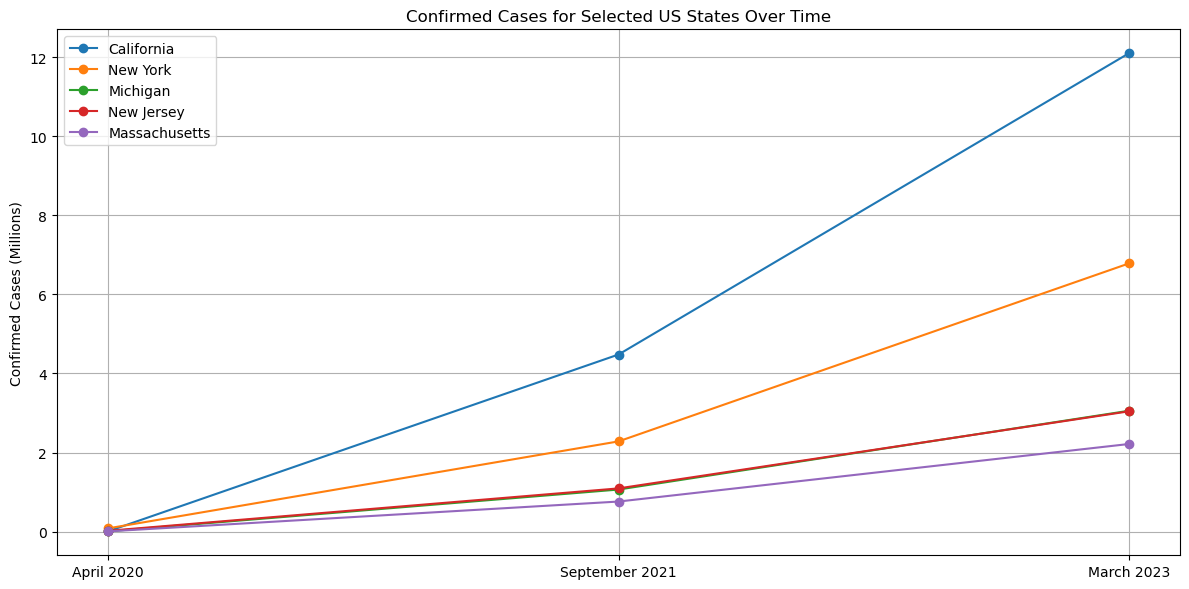

In [61]:
# Concatenate the three DataFrames
combined_df = pd.concat([start_us_states_df, mid_us_states_df, end_us_states_df])

# Filter the DataFrame to include only the five US states
states_of_interest = ['California', 'New York', 'Michigan', 'New Jersey', 'Massachusetts']
filtered_df = combined_df[combined_df['Province_State'].isin(states_of_interest)]

# Create the line graph with markers
plt.figure(figsize=(12, 6))
for state in states_of_interest:
    state_data = filtered_df[filtered_df['Province_State'] == state]
    plt.plot(['April 2020', 'September 2021', 'March 2023'], state_data['Confirmed'] / 1000000, marker='o', label=state)

plt.ylabel('Confirmed Cases (Millions)')
plt.title('Confirmed Cases for Selected US States Over Time')
plt.legend()
plt.grid(True)

# Set the y-tick labels to show values in millions
plt.yticks(range(0, int(filtered_df['Confirmed'].max() / 1000000) + 2, 2))

plt.tight_layout()

# Save graph as a png file to the desired directory
output_dir = "Images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.savefig(os.path.join(output_dir, 'Confirmed_Cases_Selected_US_States_Over_Time.png'))

plt.show()